In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import cv2, glob, os, pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

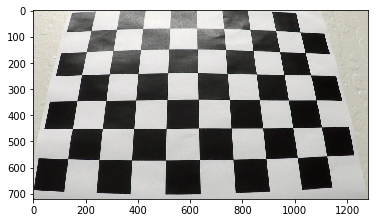

In [3]:
img = mpimg.imread('../Chessboards/calibration3.jpg')

plt.imshow(img)
plt.show()

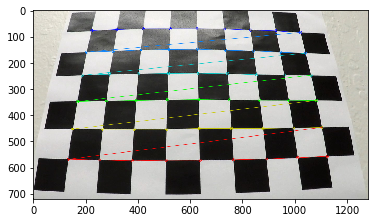

In [4]:
object_points = [] # 3D points in real world space
image_points = [] # 2D points in image plane

objp = np.zeros((6 * 9, 3), np.float32)
objp[:, : 2] = np.mgrid[0 : 9, 0 : 6].T.reshape(-1, 2)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

if ret:
    image_points.append(corners)
    object_points.append(objp)
    
    img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
    
    plt.imshow(img)
    plt.show()

In [5]:
object_points, image_points = [], []
objp = np.zeros((6 * 8, 3), np.float32)
objp[:, : 2] = np.mgrid[0 : 8, 0 : 6].T.reshape(-1, 2)

In [6]:
images = glob.glob('../Chessboards/8x6/GO*.jpg')

In [7]:
for idx, file_name in enumerate(images):
    img = mpimg.imread(file_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)
    if ret:
        image_points.append(corners)
        object_points.append(objp)
        img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)
cv2.destroyAllWindows()

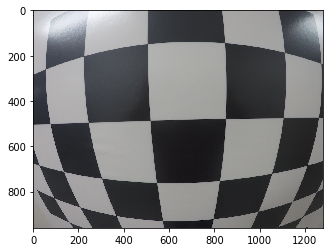

In [8]:
test_image = mpimg.imread('../Chessboards/8x6/test_image.jpg')

plt.imshow(test_image)
plt.show()

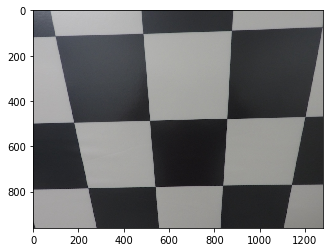

In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points,
                                                   (test_image.shape[1], test_image.shape[0]),
                                                   None, None)

dst = cv2.undistort(test_image, mtx, dist, None, mtx)

plt.imshow(dst)
plt.show()

In [10]:
distortion_object = {}
distortion_object['mtx'] = mtx
distortion_object['dist'] = dist
pickle.dump(distortion_object, open("./wide_dist_pickle.p", "wb" ))